# Homework-1: MLP for MNIST Classification

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [8]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [9]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [10]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [11]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


Epoch [0][20]	 Batch [0][550]	 Training Loss 3.8245	 Accuracy 0.0900
Epoch [0][20]	 Batch [50][550]	 Training Loss 4.2662	 Accuracy 0.2208
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.3704	 Accuracy 0.3071
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.7098	 Accuracy 0.3816
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.3684	 Accuracy 0.4524
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.1585	 Accuracy 0.5034
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.0148	 Accuracy 0.5444
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.9104	 Accuracy 0.5757
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.8299	 Accuracy 0.6027
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.7659	 Accuracy 0.6247
Epoch [0][20]	 Batch [500][550]	 Trainin

Epoch [8][20]	 Batch [100][550]	 Training Loss 0.1071	 Accuracy 0.9151
Epoch [8][20]	 Batch [150][550]	 Training Loss 0.1101	 Accuracy 0.9113
Epoch [8][20]	 Batch [200][550]	 Training Loss 0.1095	 Accuracy 0.9129
Epoch [8][20]	 Batch [250][550]	 Training Loss 0.1095	 Accuracy 0.9129
Epoch [8][20]	 Batch [300][550]	 Training Loss 0.1096	 Accuracy 0.9125
Epoch [8][20]	 Batch [350][550]	 Training Loss 0.1101	 Accuracy 0.9119
Epoch [8][20]	 Batch [400][550]	 Training Loss 0.1101	 Accuracy 0.9117
Epoch [8][20]	 Batch [450][550]	 Training Loss 0.1102	 Accuracy 0.9118
Epoch [8][20]	 Batch [500][550]	 Training Loss 0.1105	 Accuracy 0.9113

Epoch [8]	 Average training loss 0.1102	 Average training accuracy 0.9114
Epoch [8]	 Average validation loss 0.0925	 Average validation accuracy 0.9360

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.0907	 Accuracy 0.9500
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.1018	 Accuracy 0.9208
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.1036	 Accuracy 0.91

Epoch [17][20]	 Batch [50][550]	 Training Loss 0.0887	 Accuracy 0.9298
Epoch [17][20]	 Batch [100][550]	 Training Loss 0.0904	 Accuracy 0.9263
Epoch [17][20]	 Batch [150][550]	 Training Loss 0.0933	 Accuracy 0.9223
Epoch [17][20]	 Batch [200][550]	 Training Loss 0.0927	 Accuracy 0.9235
Epoch [17][20]	 Batch [250][550]	 Training Loss 0.0928	 Accuracy 0.9234
Epoch [17][20]	 Batch [300][550]	 Training Loss 0.0931	 Accuracy 0.9231
Epoch [17][20]	 Batch [350][550]	 Training Loss 0.0936	 Accuracy 0.9227
Epoch [17][20]	 Batch [400][550]	 Training Loss 0.0938	 Accuracy 0.9225
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.0940	 Accuracy 0.9225
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.0944	 Accuracy 0.9219

Epoch [17]	 Average training loss 0.0943	 Average training accuracy 0.9217
Epoch [17]	 Average validation loss 0.0801	 Average validation accuracy 0.9446

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0797	 Accuracy 0.9500
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0879	 

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9278.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [20]:
from layers import ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 3.6030	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.8152	 Accuracy 0.4373
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.5500	 Accuracy 0.5839
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.4464	 Accuracy 0.6500
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.3864	 Accuracy 0.6945
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.3453	 Accuracy 0.7263
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.3159	 Accuracy 0.7493
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.2934	 Accuracy 0.7664
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.2750	 Accuracy 0.7810
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.2601	 Accuracy 0.7929
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.2478	 Accuracy 0.8020

Epoch [0]	 Average training loss 0.2368	 Average training accuracy 0.8106
Epoch [0]	 Average validation loss 0.1078	 Average validation accuracy 0.9244

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.1085	 Accuracy 0.9400


Epoch [8]	 Average training loss 0.0683	 Average training accuracy 0.9495
Epoch [8]	 Average validation loss 0.0607	 Average validation accuracy 0.9590

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.0524	 Accuracy 0.9700
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.0630	 Accuracy 0.9569
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.0648	 Accuracy 0.9528
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.0664	 Accuracy 0.9522
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.0658	 Accuracy 0.9532
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.0657	 Accuracy 0.9530
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.0662	 Accuracy 0.9521
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.0662	 Accuracy 0.9518
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.0663	 Accuracy 0.9516
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.0663	 Accuracy 0.9517
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.0667	 Accuracy 0.9510

Epoch [9]	 Average training loss 0.0664	 Average training accuracy 

Epoch [17][20]	 Batch [350][550]	 Training Loss 0.0565	 Accuracy 0.9621
Epoch [17][20]	 Batch [400][550]	 Training Loss 0.0566	 Accuracy 0.9621
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.0566	 Accuracy 0.9622
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.0570	 Accuracy 0.9617

Epoch [17]	 Average training loss 0.0569	 Average training accuracy 0.9617
Epoch [17]	 Average validation loss 0.0525	 Average validation accuracy 0.9682

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0466	 Accuracy 0.9700
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0532	 Accuracy 0.9659
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.0549	 Accuracy 0.9628
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.0559	 Accuracy 0.9624
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.0554	 Accuracy 0.9631
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.0551	 Accuracy 0.9633
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.0557	 Accuracy 0.9628
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.0557	

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9622.



## Plot

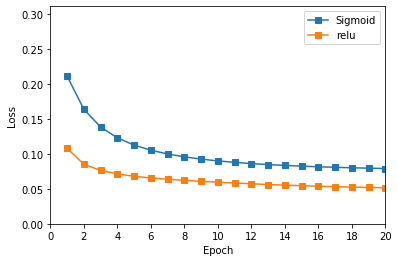

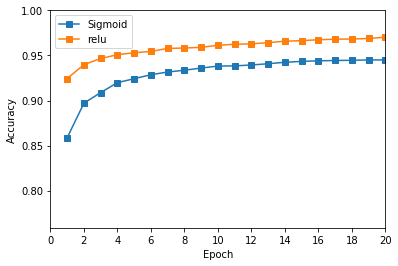

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [12]:
from criterion import SoftmaxCrossEntropyLossLayer


criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [13]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### Train

In [14]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


Epoch [0][20]	 Batch [0][550]	 Training Loss 2.5050	 Accuracy 0.1000
Epoch [0][20]	 Batch [50][550]	 Training Loss 1.8384	 Accuracy 0.5282
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.5177	 Accuracy 0.6511
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.3273	 Accuracy 0.7000
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.1946	 Accuracy 0.7322
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.0925	 Accuracy 0.7551
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.0147	 Accuracy 0.7722
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.9580	 Accuracy 0.7835
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.9068	 Accuracy 0.7943
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.8655	 Accuracy 0.8021
Epoch [0][20]	 Batch [500][550]	 Trainin

Epoch [8][20]	 Batch [50][550]	 Training Loss 0.2688	 Accuracy 0.9290
Epoch [8][20]	 Batch [100][550]	 Training Loss 0.2794	 Accuracy 0.9256
Epoch [8][20]	 Batch [150][550]	 Training Loss 0.2913	 Accuracy 0.9214
Epoch [8][20]	 Batch [200][550]	 Training Loss 0.2884	 Accuracy 0.9217
Epoch [8][20]	 Batch [250][550]	 Training Loss 0.2878	 Accuracy 0.9221
Epoch [8][20]	 Batch [300][550]	 Training Loss 0.2880	 Accuracy 0.9227
Epoch [8][20]	 Batch [350][550]	 Training Loss 0.2904	 Accuracy 0.9211
Epoch [8][20]	 Batch [400][550]	 Training Loss 0.2906	 Accuracy 0.9208
Epoch [8][20]	 Batch [450][550]	 Training Loss 0.2914	 Accuracy 0.9204
Epoch [8][20]	 Batch [500][550]	 Training Loss 0.2926	 Accuracy 0.9203

Epoch [8]	 Average training loss 0.2931	 Average training accuracy 0.9201
Epoch [8]	 Average validation loss 0.2331	 Average validation accuracy 0.9404

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.2442	 Accuracy 0.9500
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.2633	 Accuracy 0.931


Epoch [16]	 Average training loss 0.2587	 Average training accuracy 0.9307
Epoch [16]	 Average validation loss 0.2087	 Average validation accuracy 0.9474

Epoch [17][20]	 Batch [0][550]	 Training Loss 0.2183	 Accuracy 0.9600
Epoch [17][20]	 Batch [50][550]	 Training Loss 0.2330	 Accuracy 0.9408
Epoch [17][20]	 Batch [100][550]	 Training Loss 0.2424	 Accuracy 0.9369
Epoch [17][20]	 Batch [150][550]	 Training Loss 0.2526	 Accuracy 0.9328
Epoch [17][20]	 Batch [200][550]	 Training Loss 0.2503	 Accuracy 0.9332
Epoch [17][20]	 Batch [250][550]	 Training Loss 0.2502	 Accuracy 0.9334
Epoch [17][20]	 Batch [300][550]	 Training Loss 0.2507	 Accuracy 0.9337
Epoch [17][20]	 Batch [350][550]	 Training Loss 0.2525	 Accuracy 0.9326
Epoch [17][20]	 Batch [400][550]	 Training Loss 0.2528	 Accuracy 0.9326
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.2537	 Accuracy 0.9322
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.2550	 Accuracy 0.9318

Epoch [17]	 Average training loss 0.2556	 Average trai

### Test

In [15]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9356.



## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [21]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [22]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.5321	 Accuracy 0.1000
Epoch [0][20]	 Batch [50][550]	 Training Loss 1.0179	 Accuracy 0.7261
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.7633	 Accuracy 0.7958
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.6569	 Accuracy 0.8219
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.5872	 Accuracy 0.8406
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.5390	 Accuracy 0.8531
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.5044	 Accuracy 0.8618
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.4801	 Accuracy 0.8675
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.4583	 Accuracy 0.8732
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.4410	 Accuracy 0.8778
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.4273	 Accuracy 0.8813

Epoch [0]	 Average training loss 0.4146	 Average training accuracy 0.8847
Epoch [0]	 Average validation loss 0.2117	 Average validation accuracy 0.9456

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.2828	 Accuracy 0.9500

Epoch [8][20]	 Batch [500][550]	 Training Loss 0.1083	 Accuracy 0.9714

Epoch [8]	 Average training loss 0.1081	 Average training accuracy 0.9715
Epoch [8]	 Average validation loss 0.1028	 Average validation accuracy 0.9752

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.0952	 Accuracy 0.9800
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.0952	 Accuracy 0.9769
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.1018	 Accuracy 0.9741
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.1015	 Accuracy 0.9739
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.1012	 Accuracy 0.9742
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.1005	 Accuracy 0.9744
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.1015	 Accuracy 0.9741
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.1017	 Accuracy 0.9738
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.1016	 Accuracy 0.9739
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.1016	 Accuracy 0.9740
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.1029	 Accuracy 0.97

Epoch [17][20]	 Batch [300][550]	 Training Loss 0.0784	 Accuracy 0.9814
Epoch [17][20]	 Batch [350][550]	 Training Loss 0.0786	 Accuracy 0.9812
Epoch [17][20]	 Batch [400][550]	 Training Loss 0.0788	 Accuracy 0.9811
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.0789	 Accuracy 0.9809
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.0800	 Accuracy 0.9806

Epoch [17]	 Average training loss 0.0799	 Average training accuracy 0.9806
Epoch [17]	 Average validation loss 0.0869	 Average validation accuracy 0.9794

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0705	 Accuracy 0.9900
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0731	 Accuracy 0.9833
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.0773	 Accuracy 0.9824
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.0763	 Accuracy 0.9820
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.0764	 Accuracy 0.9820
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.0760	 Accuracy 0.9820
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.0770	

In [23]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9736.



## Plot

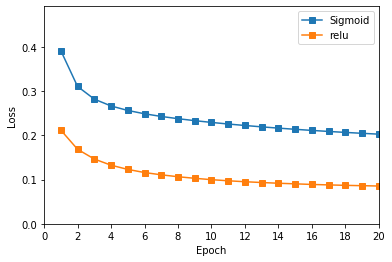

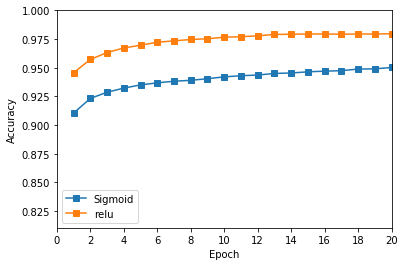

In [24]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

### ~~You have finished homework1-mlp, congratulations!~~  

**Next, according to the requirements 4) of report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**